# Project 3: Web APIs and Classification

## Problem Statement

To solve the problem of classifying business owners posts from [r/entrepreneur](https://www.reddit.com/r/Entrepreneur/) and the posts from [r/investing](https://www.reddit.com/r/investing/) as new business owners have issues with identifying creating their own business and investing in a business. With a classifier model, we can use it to seperate business ideas and business investment strategies for new business owners who desire to start their side hustle.

## Executive Summary

xxx


### Contents:
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [221]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import re
from bs4 import BeautifulSoup as bs
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import random
import time

%matplotlib inline

In [2]:
# Set the graph style
plt.style.use('ggplot')

# Data importing and Cleaning

## Obtaining the data from entrepreneur sub reddit

## Loop through the posts, 25 posts at a time

In [3]:
def get_reddit_post(url, no_loop):
    """
    This function obtains the posts from the chosen subreddit from the url variable.
    no_loop is the number of loops 
    name is the name of the csv file to save
    """
    posts = []
    after = None
    new_df = 'No dataframe as it\'s one loop'
    name = re.search('r\/(.+).json',url).group(1) # search for the name of the sub reddit

    for loop in range(no_loop): # Four loops, 25*20 = 500 posts total
        if after == None: # If there's no next post
            current_url = url # Make use of the current url
        else:
            current_url = url + '?after=' + after # Current url becomes the next post
        print(f'Current url is: {current_url}') # Prints the current url
        res = requests.get(current_url, headers={'User-agent': 'Entre 2.0'}) # Create the request, USER AGENT can be changed

        if res.status_code != 200:
            print('Status error', res.status_code) # If error, then break
            break

        current_dict = res.json() # Parse into JSON
        current_posts = [p['data'] for p in current_dict['data']['children']] # Gets the current posts
        posts.extend(current_posts) # Store it in a list named posts
        after = current_dict['data']['after'] # Get the next url

        if loop > 0: # Saving the progress
            prev_posts = pd.read_csv('./datasets/' + name + '.csv') # Save the posts
            current_df = pd.DataFrame(current_posts) # current posts in a new dataframe
            new_df = pd.concat([prev_posts, current_df]) # Once it breaks out of for loop, new_df is gone.
            new_df.to_csv('./datasets/' + name + '.csv', index=False)
        else:
            pd.DataFrame(posts).to_csv('./datasets/' + name + '.csv', index = False)

        # generate a random sleep duration to look more 'natural'
        sleep_duration = random.randint(2,6)
        print(f'Sleep for {sleep_duration} seconds') # Sleep duration in seconds
        time.sleep(sleep_duration)
        
    return new_df

In [137]:
# Scrap the entrepreneur subreddit posts
get_reddit_post('https://www.reddit.com/r/entrepreneur.json',40)

Current url is: https://www.reddit.com/r/entrepreneur.json
Sleep for 5 seconds
Current url is: https://www.reddit.com/r/entrepreneur.json?after=t3_k1sdly
Sleep for 4 seconds
Current url is: https://www.reddit.com/r/entrepreneur.json?after=t3_k1bkry
Sleep for 4 seconds
Current url is: https://www.reddit.com/r/entrepreneur.json?after=t3_k106dd
Sleep for 2 seconds
Current url is: https://www.reddit.com/r/entrepreneur.json?after=t3_k0qmvm
Sleep for 6 seconds
Current url is: https://www.reddit.com/r/entrepreneur.json?after=t3_k0fqt7
Sleep for 3 seconds
Current url is: https://www.reddit.com/r/entrepreneur.json?after=t3_k023fs
Sleep for 2 seconds
Current url is: https://www.reddit.com/r/entrepreneur.json?after=t3_k004e4
Sleep for 5 seconds
Current url is: https://www.reddit.com/r/entrepreneur.json?after=t3_jzptto
Sleep for 5 seconds
Current url is: https://www.reddit.com/r/entrepreneur.json?after=t3_jzgp14
Sleep for 5 seconds
Current url is: https://www.reddit.com/r/entrepreneur.json?after=t

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,link_flair_template_id,author_cakeday
0,NaN,Entrepreneur,Your opportunity to thank the /r/Entrepreneur ...,t2_6l4z3,False,NaN,0,False,"Thank you Thursday! - (November 26, 2020)",[],...,all_ads,True,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606396e+09,0,NaN,False,NaN,NaN
1,NaN,Entrepreneur,Happy Thanksgiving everyone!\n\nToday probably...,t2_10hwkz,False,NaN,0,False,"Being driven individuals, we are all rushing t...",[],...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606411e+09,1,NaN,False,NaN,NaN
2,NaN,Entrepreneur,"Hi, recently we had a client who was strugglin...",t2_5mi25ldv,False,NaN,0,False,How you can reduce bounce rate from your webpage?,[],...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606449e+09,0,NaN,False,NaN,NaN
3,NaN,Entrepreneur,Link to video: https://youtu.be/j6QPZp--lJE\n ...,t2_17jopcwt,False,NaN,0,False,"I made an animated summary of ""The lean Start ...",[],...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606453e+09,0,NaN,False,NaN,NaN
4,NaN,Entrepreneur,Hi all I'm a 16 year old from Adelaide Austral...,t2_1bftus7y,False,NaN,0,False,Skate ramp business,"[{'e': 'text', 't': 'Recommendations?'}]",...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606390e+09,0,NaN,False,b5eccc92-6452-11e6-93ad-0ecc2c508ed9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,None,Entrepreneur,"G'day guys, \nBack again with the second part...",t2_122vcd,False,None,0,False,Me again with another side hustle vid for feed...,"[{'e': 'text', 't': 'Feedback Please'}]",...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846882,1.605866e+09,0,None,False,da73a732-e1cf-11e3-a907-12313b073d11,NaN
21,None,Entrepreneur,Link to video: https://youtu.be/wdQRQ82AED8\n ...,t2_17jopcwt,False,None,0,False,"I made an animated summary of ""The Magic of Th...",[],...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846882,1.605848e+09,0,None,False,NaN,NaN
22,None,Entrepreneur,Have been seeing a lot lately from startups tr...,t2_1erunm82,False,None,0,False,Tik tok marketing?,[],...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846882,1.605805e+09,0,None,False,NaN,NaN
23,None,Entrepreneur,This is the best way to earn money from HOme\n...,t2_7quw6xkd,False,None,0,False,How to make passive income,[],...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846882,1.605877e+09,0,None,False,NaN,NaN


In [4]:
entre_df = pd.read_csv('./datasets/entrepreneur.csv')

In [5]:
entre_df[['title','selftext']].loc[1] # Gets the title and text of the first post

title       Being driven individuals, we are all rushing t...
selftext    Happy Thanksgiving everyone!\n\nToday probably...
Name: 1, dtype: object

### Clean the data in entrepreneur sub reddit

In [6]:
# Columns that have null values in them
null_posts_index = entre_df.isnull().sum()[entre_df.isnull().sum() > 0].index
null_posts_index

Index(['approved_at_utc', 'author_fullname', 'mod_reason_title',
       'link_flair_css_class', 'top_awarded_type',
       'author_flair_background_color', 'author_flair_template_id',
       'secure_media', 'category', 'link_flair_text', 'approved_by',
       'author_premium', 'thumbnail', 'author_flair_css_class',
       'author_flair_richtext', 'content_categories', 'mod_note',
       'removed_by_category', 'banned_by', 'author_flair_type', 'likes',
       'suggested_sort', 'banned_at_utc', 'view_count', 'author_flair_text',
       'removed_by', 'num_reports', 'distinguished', 'mod_reason_by',
       'removal_reason', 'link_flair_background_color', 'report_reasons',
       'discussion_type', 'author_patreon_flair', 'author_flair_text_color',
       'media', 'link_flair_template_id', 'author_cakeday'],
      dtype='object')

In [7]:
# Drop the null values columns, as they're mostly empty.
entre_df.drop(null_posts_index, axis=1, inplace=True)

In [8]:
# Check for null values
entre_df.isnull().sum().sum()

0

In [9]:
# Check for duplicates
entre_df.duplicated().sum()

179

In [10]:
# Finding columns with False in them and dropping them
columns_with_False = entre_df.loc[:, (entre_df == False).any()]
columns_with_False = columns_with_False.select_dtypes(exclude=['int64','float64']).sum().sort_values(ascending=False)[columns_with_False.select_dtypes(exclude=['int64','float64']).sum().sort_values(ascending=False) < 1].index
columns_with_False

Index(['clicked', 'hidden', 'hide_score', 'quarantine', 'is_original_content',
       'is_reddit_media_domain', 'is_meta', 'can_mod_post', 'is_video',
       'archived', 'is_crosspostable', 'pinned', 'media_only', 'can_gild',
       'locked', 'visited', 'contest_mode', 'saved'],
      dtype='object')

In [11]:
entre_df.drop(columns_with_False,axis=1,inplace=True)

In [12]:
# Drop the first row as it's not relevant, it's ask questions monday
entre_df.drop(labels=0, inplace=True)

In [13]:
entre_df

,subreddit,selftext,gilded,title,link_flair_richtext,subreddit_name_prefixed,pwls,downs,name,link_flair_text_color,...,send_replies,whitelist_status,mod_reports,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts
1,Entrepreneur,Happy Thanksgiving everyone!\n\nToday probably...,0,"Being driven individuals, we are all rushing t...",[],r/Entrepreneur,6,0,t3_k1j2p6,dark,...,True,all_ads,[],/r/Entrepreneur/comments/k1j2p6/being_driven_i...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606411e+09,1
2,Entrepreneur,"Hi, recently we had a client who was strugglin...",0,How you can reduce bounce rate from your webpage?,[],r/Entrepreneur,6,0,t3_k1to7g,dark,...,True,all_ads,[],/r/Entrepreneur/comments/k1to7g/how_you_can_re...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606449e+09,0
3,Entrepreneur,Link to video: https://youtu.be/j6QPZp--lJE\n ...,0,"I made an animated summary of ""The lean Start ...",[],r/Entrepreneur,6,0,t3_k1uqil,dark,...,True,all_ads,[],/r/Entrepreneur/comments/k1uqil/i_made_an_anim...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606453e+09,0
4,Entrepreneur,Hi all I'm a 16 year old from Adelaide Austral...,0,Skate ramp business,"[{'e': 'text', 't': 'Recommendations?'}]",r/Entrepreneur,6,0,t3_k1dm6e,dark,...,True,all_ads,[],/r/Entrepreneur/comments/k1dm6e/skate_ramp_bus...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606390e+09,0
5,Entrepreneur,Hey entrepreneurs - I recently came up with an...,0,Help with getting a textile prototype created.,[],r/Entrepreneur,6,0,t3_k1vl5l,dark,...,True,all_ads,[],/r/Entrepreneur/comments/k1vl5l/help_with_gett...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846881,1.606457e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,Entrepreneur,"G'day guys, \nBack again with the second part...",0,Me again with another side hustle vid for feed...,"[{'e': 'text', 't': 'Feedback Please'}]",r/Entrepreneur,6,0,t3_jxmaj6,dark,...,True,all_ads,[],/r/Entrepreneur/comments/jxmaj6/me_again_with_...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846882,1.605866e+09,0
994,Entrepreneur,Link to video: https://youtu.be/wdQRQ82AED8\n ...,0,"I made an animated summary of ""The Magic of Th...",[],r/Entrepreneur,6,0,t3_jxixy5,dark,...,True,all_ads,[],/r/Entrepreneur/comments/jxixy5/i_made_an_anim...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846882,1.605848e+09,0
995,Entrepreneur,Have been seeing a lot lately from startups tr...,0,Tik tok marketing?,[],r/Entrepreneur,6,0,t3_jx6gtw,dark,...,True,all_ads,[],/r/Entrepreneur/comments/jx6gtw/tik_tok_market...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846882,1.605805e+09,0
996,Entrepreneur,This is the best way to earn money from HOme\n...,0,How to make passive income,[],r/Entrepreneur,6,0,t3_jxoipg,dark,...,True,all_ads,[],/r/Entrepreneur/comments/jxoipg/how_to_make_pa...,all_ads,False,https://www.reddit.com/r/Entrepreneur/comments...,846882,1.605877e+09,0


In [14]:
# Title and Posts
entre_df[['title', 'selftext']]

,title,selftext
1,"Being driven individuals, we are all rushing t...",Happy Thanksgiving everyone!\n\nToday probably...
2,How you can reduce bounce rate from your webpage?,"Hi, recently we had a client who was strugglin..."
3,"I made an animated summary of ""The lean Start ...",Link to video: https://youtu.be/j6QPZp--lJE\n ...
4,Skate ramp business,Hi all I'm a 16 year old from Adelaide Austral...
5,Help with getting a textile prototype created.,Hey entrepreneurs - I recently came up with an...
...,...,...
993,Me again with another side hustle vid for feed...,"G'day guys, \nBack again with the second part..."
994,"I made an animated summary of ""The Magic of Th...",Link to video: https://youtu.be/wdQRQ82AED8\n ...
995,Tik tok marketing?,Have been seeing a lot lately from startups tr...
996,How to make passive income,This is the best way to earn money from HOme\n...


In [590]:
# Merge the title and post together using pd.concat
entre_df_merged = pd.concat([entre_df['title'], entre_df['selftext']], axis=0)
entre_df_merged = pd.DataFrame(entre_df_merged, columns=['text'])

In [591]:
# Add the labels to the dataframe
entre_df_merged['label'] = np.ones(len(entre_df_merged))
entre_df_merged

,text,label
1,"Being driven individuals, we are all rushing t...",1.0
2,How you can reduce bounce rate from your webpage?,1.0
3,"I made an animated summary of ""The lean Start ...",1.0
4,Skate ramp business,1.0
5,Help with getting a textile prototype created.,1.0
...,...,...
993,"G'day guys, \nBack again with the second part...",1.0
994,Link to video: https://youtu.be/wdQRQ82AED8\n ...,1.0
995,Have been seeing a lot lately from startups tr...,1.0
996,This is the best way to earn money from HOme\n...,1.0


## Using RegexpTokenizer 

In [592]:
# Import Tokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [601]:
a_text = " ".join(entre_df_merged.text)
a_token = tokenizer.tokenize(a_text.lower())

In [622]:
a_token.count('youtube')

1104

In [621]:
a_token.remove('youtube')
a_too

## Ending RegexpTokenizer 

In [376]:
# Full function to clean the title and the post
def post_to_words(df):
    
    new_lst = []
    
    # Stop words
    stops = set(stopwords.words('english'))
    # Lemmatizer
    lemmatizer = WordNetLemmatizer()
    
    for post in df:
        # Lowercase the text
        post = post.lower()

        # Find the https websites and removes them
        post = re.sub('\(https:.*?\)','',post)

        # Removes youtube links
        post = re.sub('https:.*?\\n','',post)

        # Removes uncaptured url links at the bottom of the text
        post = re.sub('https.*?[\\n|"]','',post)

        # Removes characters: \n\n&amp;#x200B;
        post = re.sub('\\n\\n&amp;#x200b;\\n\\n','',post)

        # Removing the special characters, like punctuation marks, periods
        post = re.sub(r'[^\w]',' ',post)

        # Removes underscores
        post = re.sub(' _', ' ',post)

        # Removes addtional white spaces
        post = re.sub(' +', ' ',post)
        
        # Stores the words in a list 
        lst = [] 
        
        # If the word is not in the stop words then, lemmantize the words
        for word in post.split():
            if not word in stops:
                lst.append(lemmatizer.lemmatize(word))
            
        new_lst.append(" ".join(lst))
        
    return new_lst

In [556]:
entre_df_merged.loc[:,'text'] = post_to_words(entre_df_merged['text'])
entre_df_merged

,text,label
1,driven individual rushing towards dream ever s...,1.0
2,reduce bounce rate webpage,1.0
3,made animated summary lean start eric ries hop...,1.0
4,skate ramp business,1.0
5,help getting textile prototype created,1.0
...,...,...
993,g day guy back second part disjoined series th...,1.0
994,link video release new video often interested ...,1.0
995,seeing lot lately startup trying figure tik to...,1.0
996,best way earn money home check video http www ...,1.0


In [557]:
# Drop duplicate posts
entre_df_merged = entre_df_merged.drop_duplicates(subset=['text'])
entre_df_merged

,text,label
1,driven individual rushing towards dream ever s...,1.0
2,reduce bounce rate webpage,1.0
3,made animated summary lean start eric ries hop...,1.0
4,skate ramp business,1.0
5,help getting textile prototype created,1.0
...,...,...
592,like start product photography service stick l...,1.0
593,im reading around sub around reddit building b...,1.0
594,fluffy content goal build 100m arr business ri...,1.0
595,hi merchant holiday season coming real soon be...,1.0


In [558]:
# text columns containing 'entrepreneur|Entrepreneur'
entre_df_merged.text[entre_df_merged.text.str.contains('entrepreneur|Entrepreneur')]

17              entrepreneur biggest thing procrastinate
24                        thought store entrepreneur com
44                           2020 best year entrepreneur
52     sale glossary entrepreneur starting journey wo...
77     opinion entrepreneurship degree v getting degr...
                             ...                        
562    video ice talked almost hour business building...
567    ever heard shadow power people closest powerfu...
576    hello entrepreneur currently junior high schoo...
588    gday guy banker turned entrepreneur turned ban...
591    hey everyone gonna post book wrote recently ho...
Name: text, Length: 147, dtype: object

In [559]:
entre_df_merged = entre_df_merged.copy()

In [560]:
# Removed words such as 'entrepreneur|Entrepreneur' to prevent data lekages
# entre_df_merged.text = entre_df_merged.text.str.replace('entrepreneur|Entrepreneur','')
entre_df_merged.loc[:,'text'] = entre_df_merged.text.str.replace('entrepreneur|Entrepreneur','')

In [565]:
# Checking for words such as 'entrepreneur|Entrepreneur' 
entre_df_merged.text[entre_df_merged.text.str.contains('entrepreneur|Entrepreneur')]

Series([], Name: text, dtype: object)

In [566]:
# Checking for null values
entre_df_merged.isnull().sum()

text     0
label    0
dtype: int64

## EDA on Entrepreneurship sub 

### Frequency of the words

In [567]:
bag_of_words = " ".join(entre_df_merged.text).split()
bag_of_words

['driven',
 'individual',
 'rushing',
 'towards',
 'dream',
 'ever',
 'stop',
 'ask',
 'point',
 'hustle',
 'nothing',
 'innate',
 'desire',
 'create',
 'impact',
 'reflecting',
 'lot',
 'would',
 'love',
 'know',
 'feeling',
 'reduce',
 'bounce',
 'rate',
 'webpage',
 'made',
 'animated',
 'summary',
 'lean',
 'start',
 'eric',
 'ries',
 'hope',
 'useful',
 'skate',
 'ramp',
 'business',
 'help',
 'getting',
 'textile',
 'prototype',
 'created',
 'degree',
 'phd',
 'eminent',
 'college',
 'ensure',
 'financial',
 'freedom',
 'executing',
 'idea',
 'random',
 'thought',
 'list',
 '363',
 'question',
 'vcs',
 'investor',
 'ask',
 'startup',
 'founder',
 'google',
 'sheet',
 'creating',
 'product',
 'adding',
 'additional',
 'class',
 'trademark',
 'application',
 'increase',
 'chance',
 'getting',
 'trademark',
 '3',
 'month',
 'startup',
 'going',
 'startup',
 'starting',
 'reddit',
 'please',
 'going',
 'wrong',
 'use',
 'giveaway',
 'grow',
 'audience',
 'without',
 'douche',
 'pande

In [568]:
# Create a dictionary for the frequency of words
word_dict = {}
for word in bag_of_words:
    word_dict[word] = bag_of_words.count(word)

In [569]:
# Most frequently occuring word
max(word_dict, key=word_dict.get)

'business'

In [570]:
# Least frequently occuring word
min(word_dict, key=word_dict.get)

'innate'

In [571]:
# Sort the words frequency
sort_words_freq = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

for i in sort_words_freq[:10]:
    print(i[0], i[1])

business 815
people 481
like 454
get 450
would 431
product 405
one 384
idea 380
time 375
want 367


In [572]:
entre_freq_df = pd.DataFrame(sort_words_freq, columns=['word','frequency'])
entre_freq_df

,word,frequency
0,business,815
1,people,481
2,like,454
3,get,450
4,would,431
...,...,...
7799,100gb,1
7800,bandwidth,1
7801,10000,1
7802,auditing,1


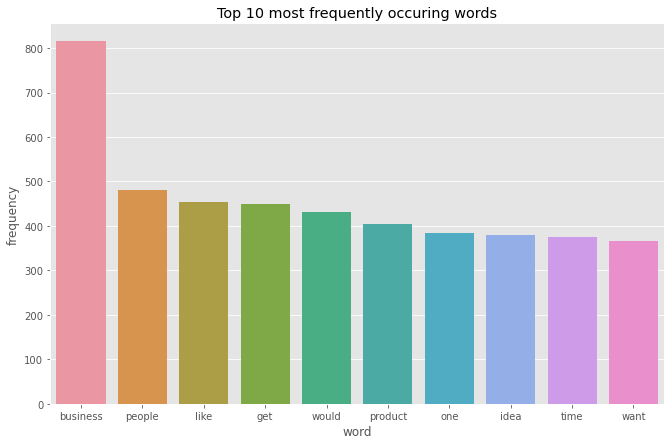

In [575]:
plt.figure(figsize=(11,7))
sns.barplot(x='word', y='frequency', data=entre_freq_df[:10])
plt.title('Top 10 most frequently occuring words');

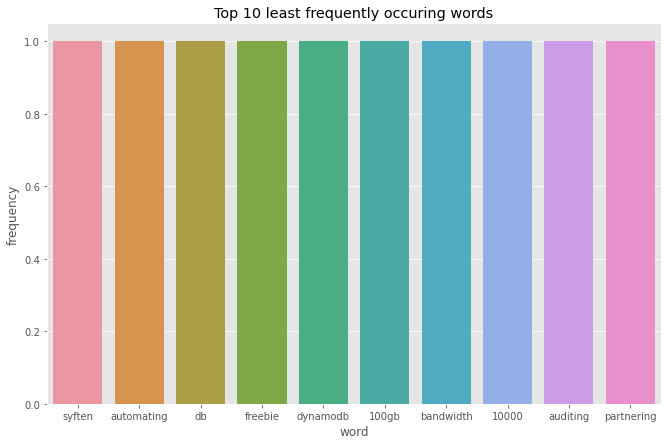

In [583]:
plt.figure(figsize=(11,7))
sns.barplot(x='word', y='frequency', data=entre_freq_df.tail(10))
plt.title('Top 10 least frequently occuring words');

(0.0, 25.0)

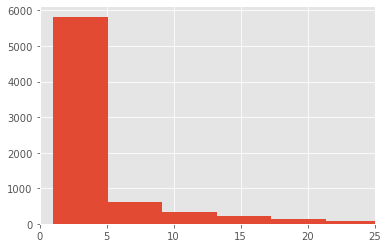

In [589]:
entre_freq_df.frequency.hist(bins=200)
plt.xlim(0,25)

In [637]:
entre_freq_df[(entre_freq_df.word == 'discord') | (entre_freq_df.word == 'youtube') | (entre_freq_df.word == 'www') | (entre_freq_df.word == 'com') |
             (entre_freq_df.word == 'https')]

,word,frequency
144,com,81
371,www,38
396,youtube,36
1129,discord,12


## Testing out 

In [336]:
# Removes unwanted links and lower case the words
test = remove_unwanted_links(entre_df_merged['Text'])
test

['being driven individuals we are all rushing towards our dreams but do we ever stop to ask ourselves what s the point what if all this hustle is for nothing why do we have this innate desire to create an impact have been reflecting a lot myself would love to know your feelings too ',
 'how you can reduce bounce rate from your webpage ',
 'i made an animated summary of the lean start up by eric ries i hope this is useful to you ',
 'skate ramp business',
 'help with getting a textile prototype created ',
 'degrees phd s from eminent college does not ensure you financial freedom executing you ideas does just a random thought ',
 'list of 363 questions that vcs and investors ask startup founders google sheet ',
 'creating a product',
 'does adding additional classes to a trademark application increase your chances of getting the trademark ',
 '3 months into a startup where we re at now and where we re going ',
 'startup just not starting up reddit please where are we going wrong ',
 'how

In [337]:
# Removes stop words
test = remove_stop_words(test)
test

['driven individuals rushing towards dreams ever stop ask point hustle nothing innate desire create impact reflecting lot would love know feelings',
 'reduce bounce rate webpage',
 'made animated summary lean start eric ries hope useful',
 'skate ramp business',
 'help getting textile prototype created',
 'degrees phd eminent college ensure financial freedom executing ideas random thought',
 'list 363 questions vcs investors ask startup founders google sheet',
 'creating product',
 'adding additional classes trademark application increase chances getting trademark',
 '3 months startup going',
 'startup starting reddit please going wrong',
 'use giveaway grow audience without douche',
 'pandemic add mom test rob fitzpatrick',
 'candy shop',
 'good feeling feel passion work',
 'make people buy products',
 'entrepreneur biggest thing procrastinate',
 'freight company',
 '50k cash business ideas',
 '100k 100 days day 3',
 'feeling limited ambitions university quit',
 'new company aquire ad

In [338]:
# Lemmitizes words
test = lemmitizer(test)
test

['driven individual rushing towards dream ever stop ask point hustle nothing innate desire create impact reflecting lot would love know feeling',
 'reduce bounce rate webpage',
 'made animated summary lean start eric ries hope useful',
 'skate ramp business',
 'help getting textile prototype created',
 'degree phd eminent college ensure financial freedom executing idea random thought',
 'list 363 question vcs investor ask startup founder google sheet',
 'creating product',
 'adding additional class trademark application increase chance getting trademark',
 '3 month startup going',
 'startup starting reddit please going wrong',
 'use giveaway grow audience without douche',
 'pandemic add mom test rob fitzpatrick',
 'candy shop',
 'good feeling feel passion work',
 'make people buy product',
 'entrepreneur biggest thing procrastinate',
 'freight company',
 '50k cash business idea',
 '100k 100 day day 3',
 'feeling limited ambition university quit',
 'new company aquire advanced technolog

In [349]:
" ".join(test)

'driven individual rushing towards dream ever stop ask point hustle nothing innate desire create impact reflecting lot would love know feeling reduce bounce rate webpage made animated summary lean start eric ries hope useful skate ramp business help getting textile prototype created degree phd eminent college ensure financial freedom executing idea random thought list 363 question vcs investor ask startup founder google sheet creating product adding additional class trademark application increase chance getting trademark 3 month startup going startup starting reddit please going wrong use giveaway grow audience without douche pandemic add mom test rob fitzpatrick candy shop good feeling feel passion work make people buy product entrepreneur biggest thing procrastinate freight company 50k cash business idea 100k 100 day day 3 feeling limited ambition university quit new company aquire advanced technology bigger company keep secret crossroad thought store entrepreneur com weed business p

## End of test

### EDA on entrepreneur sub reddit

# Obtaining the data from investing sub reddit

In [134]:
get_reddit_post("https://www.reddit.com/r/investing.json",40)

Current url is: https://www.reddit.com/r/investing.json
Sleep for 3 seconds
Current url is: https://www.reddit.com/r/investing.json?after=t3_k1ar59
Sleep for 2 seconds
Current url is: https://www.reddit.com/r/investing.json?after=t3_k0skoz
Sleep for 4 seconds
Current url is: https://www.reddit.com/r/investing.json?after=t3_k14v4b
Sleep for 3 seconds
Current url is: https://www.reddit.com/r/investing.json?after=t3_k13obb
Sleep for 2 seconds
Current url is: https://www.reddit.com/r/investing.json?after=t3_k0c904
Sleep for 2 seconds
Current url is: https://www.reddit.com/r/investing.json?after=t3_jzouxt
Sleep for 4 seconds
Current url is: https://www.reddit.com/r/investing.json?after=t3_jzw6qe
Sleep for 4 seconds
Current url is: https://www.reddit.com/r/investing.json?after=t3_jyi5en
Sleep for 2 seconds
Current url is: https://www.reddit.com/r/investing.json?after=t3_jxw3s1
Sleep for 5 seconds
Current url is: https://www.reddit.com/r/investing.json?after=t3_jxv2zp
Sleep for 2 seconds
Curr

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday
0,NaN,investing,"Alright everyone, it looks like we had pretty ...",t2_p8vmm,False,NaN,1,False,Formal posting guidelines for political topics...,[],...,/r/investing/comments/cyee69/formal_posting_gu...,all_ads,True,https://www.reddit.com/r/investing/comments/cy...,1210867,1.567366e+09,2,NaN,False,NaN
1,NaN,investing,"If your question is ""I have $10,000, what do I...",t2_6l4z3,False,NaN,0,False,Daily Advice Thread - All basic help or advice...,[],...,/r/investing/comments/k1e64o/daily_advice_thre...,all_ads,True,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606393e+09,0,NaN,False,NaN
2,NaN,investing,"Hi everyone,\n\nI work as a PM at a large tech...",t2_4dhite7i,False,NaN,0,False,Key Takeaways from the Airbnb IPO filing,[],...,/r/investing/comments/k1qvku/key_takeaways_fro...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606437e+09,1,NaN,False,NaN
3,NaN,investing,BlackRock Inc. acquired a new position in shar...,t2_84egmxgw,False,NaN,0,False,BlackRock Inc. Invests $278.34 Million more in...,[],...,/r/investing/comments/k1rka0/blackrock_inc_inv...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606440e+09,1,NaN,False,NaN
4,NaN,investing,[PLTR stock data.](https://imgur.com/a/T5V7OEy...,t2_7r79rqlg,False,NaN,0,False,PLTR jumps 12% even though US market's closed,[],...,/r/investing/comments/k1euv4/pltr_jumps_12_eve...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606396e+09,0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,None,investing,My research found VXUS and VTIAX have identica...,t2_usz9c,False,None,0,False,"comparison question about, VXUS -vs- VTIAX, To...",[],...,/r/investing/comments/ju54cu/comparison_questi...,all_ads,False,https://www.reddit.com/r/investing/comments/ju...,1210868,1.605373e+09,0,None,False,NaN
21,None,investing,"Just wondering, what are the likelihood $BABA ...",t2_7xolk5wy,False,None,0,False,$NIO and $BABA,[],...,/r/investing/comments/jtruyy/nio_and_baba/,all_ads,False,https://www.reddit.com/r/investing/comments/jt...,1210868,1.605313e+09,0,None,False,NaN
22,None,investing,[https://www.reuters.com/article/usa-china-sec...,t2_15ayrm,False,None,0,False,Trump administration bans U.S. investments in ...,[],...,/r/investing/comments/jt3hj6/trump_administrat...,all_ads,False,https://www.reddit.com/r/investing/comments/jt...,1210868,1.605216e+09,0,None,False,NaN
23,None,investing,"Hi,\n\nI need to perform a risk adjusted perfo...",t2_4yjc9ug1,False,None,0,False,Risk Free Rate for Risk-adjusted performance e...,[],...,/r/investing/comments/ju23in/risk_free_rate_fo...,all_ads,False,https://www.reddit.com/r/investing/comments/ju...,1210868,1.605361e+09,0,None,False,NaN


In [136]:
invest_df = pd.read_csv('./datasets/investing.csv')
invest_df

,approved_at_utc,subreddit,selftext,author_fullname,saved,mod_reason_title,gilded,clicked,title,link_flair_richtext,...,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts,media,is_video,author_cakeday
0,NaN,investing,"Alright everyone, it looks like we had pretty ...",t2_p8vmm,False,NaN,1,False,Formal posting guidelines for political topics...,[],...,/r/investing/comments/cyee69/formal_posting_gu...,all_ads,True,https://www.reddit.com/r/investing/comments/cy...,1210867,1.567366e+09,2,NaN,False,NaN
1,NaN,investing,"If your question is ""I have $10,000, what do I...",t2_6l4z3,False,NaN,0,False,Daily Advice Thread - All basic help or advice...,[],...,/r/investing/comments/k1e64o/daily_advice_thre...,all_ads,True,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606393e+09,0,NaN,False,NaN
2,NaN,investing,"Hi everyone,\n\nI work as a PM at a large tech...",t2_4dhite7i,False,NaN,0,False,Key Takeaways from the Airbnb IPO filing,[],...,/r/investing/comments/k1qvku/key_takeaways_fro...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606437e+09,1,NaN,False,NaN
3,NaN,investing,BlackRock Inc. acquired a new position in shar...,t2_84egmxgw,False,NaN,0,False,BlackRock Inc. Invests $278.34 Million more in...,[],...,/r/investing/comments/k1rka0/blackrock_inc_inv...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606440e+09,1,NaN,False,NaN
4,NaN,investing,[PLTR stock data.](https://imgur.com/a/T5V7OEy...,t2_7r79rqlg,False,NaN,0,False,PLTR jumps 12% even though US market's closed,[],...,/r/investing/comments/k1euv4/pltr_jumps_12_eve...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606396e+09,0,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,investing,My research found VXUS and VTIAX have identica...,t2_usz9c,False,NaN,0,False,"comparison question about, VXUS -vs- VTIAX, To...",[],...,/r/investing/comments/ju54cu/comparison_questi...,all_ads,False,https://www.reddit.com/r/investing/comments/ju...,1210868,1.605373e+09,0,NaN,False,NaN
988,NaN,investing,"Just wondering, what are the likelihood $BABA ...",t2_7xolk5wy,False,NaN,0,False,$NIO and $BABA,[],...,/r/investing/comments/jtruyy/nio_and_baba/,all_ads,False,https://www.reddit.com/r/investing/comments/jt...,1210868,1.605313e+09,0,NaN,False,NaN
989,NaN,investing,[https://www.reuters.com/article/usa-china-sec...,t2_15ayrm,False,NaN,0,False,Trump administration bans U.S. investments in ...,[],...,/r/investing/comments/jt3hj6/trump_administrat...,all_ads,False,https://www.reddit.com/r/investing/comments/jt...,1210868,1.605216e+09,0,NaN,False,NaN
990,NaN,investing,"Hi,\n\nI need to perform a risk adjusted perfo...",t2_4yjc9ug1,False,NaN,0,False,Risk Free Rate for Risk-adjusted performance e...,[],...,/r/investing/comments/ju23in/risk_free_rate_fo...,all_ads,False,https://www.reddit.com/r/investing/comments/ju...,1210868,1.605361e+09,0,NaN,False,NaN


### Clean the data in investing sub reddit

In [138]:
# Columns that have null values in them
null_posts_index = invest_df.isnull().sum()[invest_df.isnull().sum() > 0].index
null_posts_index

Index(['approved_at_utc', 'author_fullname', 'mod_reason_title',
       'link_flair_css_class', 'top_awarded_type',
       'author_flair_background_color', 'author_flair_template_id',
       'secure_media', 'category', 'link_flair_text', 'approved_by',
       'author_premium', 'thumbnail', 'author_flair_css_class',
       'author_flair_richtext', 'content_categories', 'mod_note',
       'removed_by_category', 'banned_by', 'author_flair_type', 'likes',
       'suggested_sort', 'banned_at_utc', 'view_count', 'author_flair_text',
       'removed_by', 'num_reports', 'distinguished', 'mod_reason_by',
       'removal_reason', 'link_flair_background_color', 'report_reasons',
       'discussion_type', 'author_patreon_flair', 'author_flair_text_color',
       'media', 'author_cakeday'],
      dtype='object')

In [139]:
# Drop the null values columns, as they're mostly empty.
invest_df.drop(null_posts_index, axis=1, inplace=True)

In [140]:
# Check for null values
invest_df.isnull().sum().sum()

0

In [141]:
# Check for duplicates
invest_df.duplicated().sum()

86

In [142]:
# Finding columns with False in them and dropping them
columns_with_False = invest_df.loc[:, (invest_df == False).any()]
columns_with_False = columns_with_False.select_dtypes(exclude=['int64','float64']).sum().sort_values(ascending=False)[columns_with_False.select_dtypes(exclude=['int64','float64']).sum().sort_values(ascending=False) < 1].index
columns_with_False

Index(['clicked', 'hidden', 'quarantine', 'is_original_content',
       'is_reddit_media_domain', 'is_meta', 'can_mod_post', 'is_video',
       'is_crosspostable', 'pinned', 'over_18', 'media_only', 'can_gild',
       'spoiler', 'visited', 'contest_mode', 'saved'],
      dtype='object')

In [143]:
invest_df.drop(columns_with_False,axis=1,inplace=True)

In [144]:
# Drop the first row as it's not relevant, it's ask questions monday
invest_df.drop(labels=0, inplace=True)

In [145]:
invest_df

,subreddit,selftext,gilded,title,link_flair_richtext,subreddit_name_prefixed,pwls,downs,hide_score,name,...,send_replies,whitelist_status,mod_reports,permalink,parent_whitelist_status,stickied,url,subreddit_subscribers,created_utc,num_crossposts
1,investing,"If your question is ""I have $10,000, what do I...",0,Daily Advice Thread - All basic help or advice...,[],r/investing,6,0,False,t3_k1e64o,...,False,all_ads,[],/r/investing/comments/k1e64o/daily_advice_thre...,all_ads,True,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606393e+09,0
2,investing,"Hi everyone,\n\nI work as a PM at a large tech...",0,Key Takeaways from the Airbnb IPO filing,[],r/investing,6,0,False,t3_k1qvku,...,True,all_ads,[],/r/investing/comments/k1qvku/key_takeaways_fro...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606437e+09,1
3,investing,BlackRock Inc. acquired a new position in shar...,0,BlackRock Inc. Invests $278.34 Million more in...,[],r/investing,6,0,False,t3_k1rka0,...,True,all_ads,[],/r/investing/comments/k1rka0/blackrock_inc_inv...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606440e+09,1
4,investing,[PLTR stock data.](https://imgur.com/a/T5V7OEy...,0,PLTR jumps 12% even though US market's closed,[],r/investing,6,0,False,t3_k1euv4,...,True,all_ads,[],/r/investing/comments/k1euv4/pltr_jumps_12_eve...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606396e+09,0
5,investing,One of Japan's biggest stock investors just...,0,Japan's Stock-Playing Central Bank Racks Up $5...,[],r/investing,6,0,False,t3_k1qzx8,...,True,all_ads,[],/r/investing/comments/k1qzx8/japans_stockplayi...,all_ads,False,https://www.reddit.com/r/investing/comments/k1...,1210867,1.606438e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,investing,My research found VXUS and VTIAX have identica...,0,"comparison question about, VXUS -vs- VTIAX, To...",[],r/investing,6,0,False,t3_ju54cu,...,True,all_ads,[],/r/investing/comments/ju54cu/comparison_questi...,all_ads,False,https://www.reddit.com/r/investing/comments/ju...,1210868,1.605373e+09,0
988,investing,"Just wondering, what are the likelihood $BABA ...",0,$NIO and $BABA,[],r/investing,6,0,False,t3_jtruyy,...,True,all_ads,[],/r/investing/comments/jtruyy/nio_and_baba/,all_ads,False,https://www.reddit.com/r/investing/comments/jt...,1210868,1.605313e+09,0
989,investing,[https://www.reuters.com/article/usa-china-sec...,0,Trump administration bans U.S. investments in ...,[],r/investing,6,0,False,t3_jt3hj6,...,True,all_ads,[],/r/investing/comments/jt3hj6/trump_administrat...,all_ads,False,https://www.reddit.com/r/investing/comments/jt...,1210868,1.605216e+09,0
990,investing,"Hi,\n\nI need to perform a risk adjusted perfo...",0,Risk Free Rate for Risk-adjusted performance e...,[],r/investing,6,0,False,t3_ju23in,...,True,all_ads,[],/r/investing/comments/ju23in/risk_free_rate_fo...,all_ads,False,https://www.reddit.com/r/investing/comments/ju...,1210868,1.605361e+09,0


### Merge both subreddit dataframes

### Preprocessing & Modelling for Entrepreneur DF

### Conclusions and recommendations

#### 2. Display Data

Print the first 10 rows of each dataframe

First 10 rows

In [131]:
# View first 10 rows
sat_2017.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 

For the sat_2017 dataframe, it provides the attributes: 
* State, identified in the State column 
* Participation, identified as the state-by-state participation rate
* Evidence-based reading and writing, average score of Evidence-based reading and writing
* Math scores, average score of Math scores
* Total scores, average score of Total scores

There are a total of 50 states together with the District of Columbia.

For the act_2017 dataframe, it provides the attributes: 
* State, identified in the State column 
* Average participation rate, identified as the state-by-state participation rate
* English, average score of English scores
* Math, average score of Math scores 
* Reading, average score of Reading scores
* Science, average score of Science scores
* Composite scores, average score of Composite scores

There are a total of 50 states together with the District of Columbia and the national average

#### 4a. Does the data look complete? 

Answer: xxx

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each attributes? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:

## Variable Minimum scores and maximum scores

In [1]:
# sat_2017 minimum and max scores


The minimum and maximum scores for ERW is correct.

The minimum score for sat_2017 math is 52, but the range is between 468 ~ 651, based on the pdf file the **correct value should be 524**.

In [134]:
sat_2017['Math'].describe()

count     51.000000
mean     547.627451
std       84.909119
min       52.000000
25%      522.000000
50%      548.000000
75%      599.000000
max      651.000000
Name: Math, dtype: float64

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

#### 5. What are your data types? 
Display the data types of each feature. 

In [149]:
#code
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [150]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(5), object(2)
memory usage: 3.0+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: 

For xxx, participation should be a float type not object

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

## Transforming xxx attribute into xxx type

In [151]:
#code
# sat_2017['Participation'] = sat_2017['Participation'].apply(lambda i:float(i.replace('%','')))
# sat_2017['Participation']

0       5.0
1      38.0
2      30.0
3       3.0
4      53.0
5      11.0
6     100.0
7     100.0
8     100.0
9      83.0
10     61.0
11     55.0
12     93.0
13      9.0
14     63.0
15      2.0
16      4.0
17      4.0
18      4.0
19     95.0
20     69.0
21     76.0
22    100.0
23      3.0
24      2.0
25      3.0
26     10.0
27      3.0
28     26.0
29     96.0
30     70.0
31     11.0
32     67.0
33     49.0
34      2.0
35     12.0
36      7.0
37     43.0
38     65.0
39     71.0
40     50.0
41      3.0
42      5.0
43     62.0
44      3.0
45     60.0
46     65.0
47     64.0
48     14.0
49      3.0
50      3.0
Name: Participation, dtype: float64

In [152]:
sat_2017['Participation'].dtype

dtype('float64')

- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

- Display the data types again to confirm they are correct.

In [155]:
#Code:
xxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [156]:
xxx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null     float64
 5   Science        52 non-null     float64
 6   Composite      52 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.0+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

## Changing the column names for xxx

Change them to sat_17_participation, sat_17_evidenced_based_reading_writing, sat_17_math, sat_17_total

First change all to lower case

In [157]:
#code
# sat_2017 = sat_2017.rename(str.lower, axis='columns')
# sat_2017.head()

,state,participation,evidence-based reading and writing,math,total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [158]:
xxx.columns

Index(['state', 'participation', 'evidence-based reading and writing', 'math',
       'total'],
      dtype='object')

In [159]:
# sat_2017 = sat_2017.rename(columns={k:"sat_17_"+k for k in sat_2017.columns[1:]}) # Run once only, if not it'll duplicate
# sat_2017.head()

,state,sat_17_participation,sat_17_evidence-based reading and writing,sat_17_math,sat_17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [160]:
# sat_2017 = sat_2017.rename(columns={"sat_17_evidence-based reading and writing": "sat_17_erw"})
# sat_2017.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [162]:
act_2017 = act_2017.rename(str.lower, axis='columns')
act_2017.head()

,state,participation,english,math,reading,science,composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [163]:
act_2017 = act_2017.rename(columns={k:"act_17_"+k for k in act_2017.columns[1:]})
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**|

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|State of the data| 
|sat_17_participation|float|SAT|State participation rate in 2017|
|sat_17_erw|integer|SAT|State average Evidence-Based Reading and Writing score in 2017|
|sat_17_math|integer|SAT|State average Math score in 2017|
|sat_17_total|integer|SAT|State average Total score in 2017|
|state|object|ACT|State of the data|
|act_17_participation|float|ACT|State participation rate in 2017|
|act_17_english|float|ACT|State average English score in 2017|
|act_17_math|float|ACT|State average Math score in 2017|
|act_17_reading|float|ACT|State average Reading score in 2017|
|act_17_science|float|ACT|State average Science score in 2017|
|act_17_composite|float|ACT|State average Composite score in 2017|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [166]:
# Need to remove index 0 as it's the national aggregate
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


In [167]:
act_2017 = act_2017.drop(0, axis='index')
act_2017.head()

,state,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [170]:
#Code:
combined_2017 = sat_2017.merge(act_2017,on='state')
combined_2017.head()

,state,sat_17_participation,sat_17_erw,sat_17_math,sat_17_total,act_17_participation,act_17_english,act_17_math,act_17_reading,act_17_science,act_17_composite
0,Alabama,5.0,593,572,1165,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547,533,1080,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563,553,1116,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614,594,1208,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531,524,1055,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [171]:
#code
# combined_2017.to_csv('../data/combined_2017.csv')

In [186]:
def add_underscore_char(words,test_name='test'):
    '''
    This function will covert the strings to lower case and add the test and year
    names to the column
    '''
    new_dict = dict()
    for word in words:
        lst = [w.lower() for w in word.split()]
        if len(lst) > 1:
            if lst[0] == 'percentage':
                new_dict[word] = test_name + "participation"
            elif lst[0] == 'average':
                new_dict[word] = test_name + lst[1]
            else:
                new_dict[word] = test_name+"_".join(lst)
        else:
            new_dict[word] = word.lower()
    return new_dict
            
add_underscore_char(act_2018.columns,"act_18_")

{'State': 'state',
 'Percentage of Students Tested': 'act_18_participation',
 'Average Composite Score': 'act_18_composite',
 'Average English Score': 'act_18_english',
 'Average Math Score': 'act_18_math',
 'Average Reading Score': 'act_18_reading',
 'Average Science Score': 'act_18_science'}

In [193]:
final_sat_act.to_csv('../data/final.csv')

Update the data dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|final.csv|State of the data| 
|sat_17_participation|float|final.csv|State participation rate in 2017|
|sat_17_erw|integer|final.csv|State average Evidence-Based Reading and Writing score in 2017|
|sat_17_math|integer|final.csv|State average Math score in 2017|
|sat_17_total|integer|final.csv|State average Total score in 2017|
|act_17_participation|float|final.csv|State participation rate in 2017|
|act_17_english|float|final.csv|State average English score in 2017|
|act_17_math|float|final.csv|State average Math score in 2017|
|act_17_reading|float|final.csv|State average Reading score in 2017|
|act_17_science|float|final.csv|State average Science score in 2017|
|act_17_composite|float|final.csv|State average Composite score in 2017|
|sat_18_participation|float|final.csv|State participation rate in 2018|
|sat_18_erw|integer|final.csv|State average Evidence-Based Reading and Writing score in 2018|
|sat_18_math|integer|final.csv|State average Math score in 2018|
|sat_18_total|integer|final.csv|State average Total score in 2018|
|act_18_participation|float|final.csv|State participation rate in 2018|
|act_18_english|float|final.csv|State average English score in 2018|
|act_18_math|float|final.csv|State average Math score in 2018|
|act_18_reading|float|final.csv|State average Reading score in 2018|
|act_18_science|float|final.csv|State average Science score in 2018|
|act_18_composite|float|final.csv|State average Composite score in 2018|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [194]:
final_sat_act.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat_17_erw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat_17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat_17_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act_17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act_17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act_17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act_17_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act_17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act_17_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## In Summary

**SAT tests**

The participation rate for SAT increases significantly for **Colorado** from 11% in 2017 to 100%. This also lead to a decrease in test scores for SAT.

The other states do not differ as much.

**Illinois** has a large increase in SAT participation with a 1000% increase in sat participation from 2017 to 2018


**ACT tests**

**Colorado** faced the biggest decline in participation rates of act 100% in 2017 to 30% in 2018.

Largest increase in participation rate for **Ohio** with about 33% increase in participation rates


**Do any states show have >50% participation on both tests either year?**

Only 3 states, Florida, Georgia and Hawaii showed more than 50% participation rates in both tests and years.

This shows that most students will take either 1 of the tests due to either time or financial constraints.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

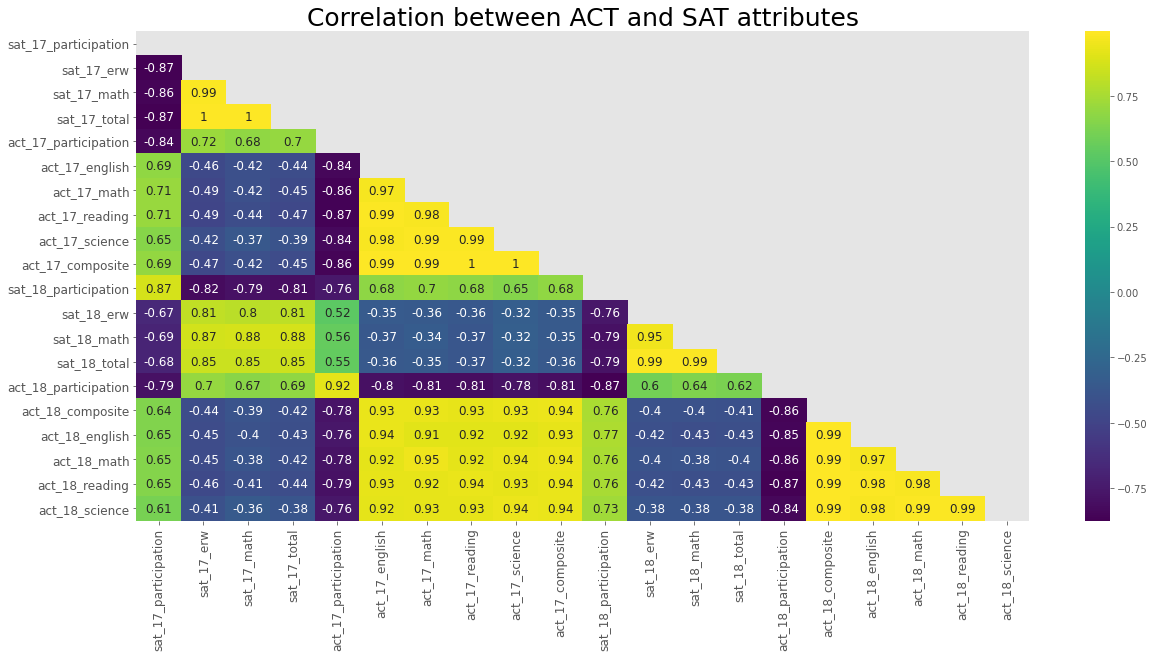

In [228]:
# mask = np.zeros_like(df.corr())
# mask[np.triu_indices_from(mask)] = True

# plt.figure(figsize=(20,9))
# sns.heatmap(df.corr(),cmap='viridis',annot=True, mask = mask, annot_kws={'size':12})
# plt.title('Correlation between xxx and yyy attributes', fontsize=25)
# plt.xticks(fontsize=12)
# plt.yticks(fontsize=12)

# plt.show()

From the heatmap, there's high negative correlation between SAT and ACT participation rate with -84% in 2017 and -85% in 2018. This translates to states with high SAT participation rates are more likely to have low ACT participation rates, vice versa.

There's an interesting correlation between the score and participation rates. For SAT, the correlation between average total score and participation was -87% in 2017 and -79% in 2018. For ACT, the correlations were -86% in 2017 and -86% in 2018. This shows that the higher the participation, the lower the average total score. This is likely due to students who show greater interest taking the test in cases of low participation and the scores being lower for cases in high participation as the range of student skills become wider.



#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [229]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels = None, bins=8, sup_title=None,lw=2):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    if len(list_of_columns) > 2:
        figsize=(15,14)
    else:
        figsize=(11,7)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=figsize) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    fig.suptitle(sup_title, fontsize=20)
    
    # Calculating Mean, Median and Mode
    mean = dataframe[list_of_columns].mean()
    median = dataframe[list_of_columns].median()
    mode = dataframe[list_of_columns].mode().min()
    
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        color_lst = ['green', 'red', 'purple', 'yellow']
        #ax[i].hist(dataframe[column],bins=8, color=color) # feel free to add more settings
        sns.histplot(x=dataframe[column], data=dataframe, bins=bins, color = color_lst[i], ax=ax[i])
        # Set titles, labels, etc here for each subplot
        
        # Plotting the Axes vline
        ax[i].axvline(mean[i], color='magenta', label='mean', lw=lw)
        ax[i].axvline(median[i], color='blue', label='median', lw=lw)
        ax[i].axvline(mode[i], color='black', label='mode', lw=lw)
        
        ax[i].set_title(list_of_titles[i], fontsize=15)
        ax[i].set_xlabel(list_of_xlabels, fontsize=15)
        ax[i].set_ylabel('State Count')
        ax[i].legend(['Mean', 'Median', 'Mode'])

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

## Plotting the participation rates for SAT and ACT 2017 and 2018

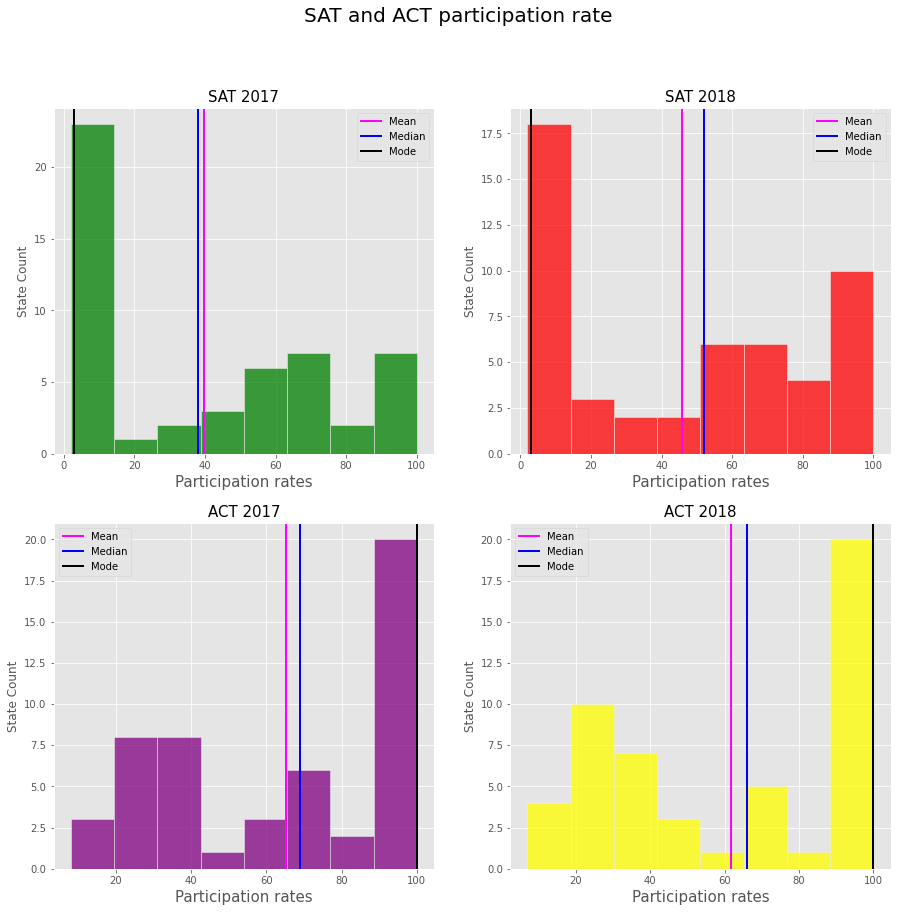

In [231]:
subplot_histograms(final_sat_act, ['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation'],
                   ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], 'Participation rates', 
                   sup_title='SAT and ACT participation rate')

In [232]:
final_sat_act[['act_17_participation', 'act_18_participation']].agg(['mean', 'median'])

,act_17_participation,act_18_participation
mean,65.254902,61.647059
median,69.000000,66.000000


Most of the participation rate is between **0-10%** for **SAT**.

There seems to be about **25%** increase in SAT participation from 2017 to 2018 judging from the *mean values*.

Participation rate for **ACT** is much higher compared to SAT. Also, the participation rates do not differ as much year to year.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [243]:
def lmplots(dataframe, x, y, title, xlabel = None, ylabel = None):    
    sns.lmplot(x=x, y=y, data=dataframe, aspect=2, height=6, ci=None, scatter_kws={'color':'darkred'}, line_kws={'color':'green'})
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=15, pad=15)
#     plt.xticks(ticks=np.arange(450,700,25), labels=[str(x) for x in np.arange(450,700,25)])
    plt.xlabel(xlabel, fontsize=12, labelpad=20)
    plt.ylabel(ylabel, fontsize=12, labelpad=20)

## SAT and ACT 2017 math scores

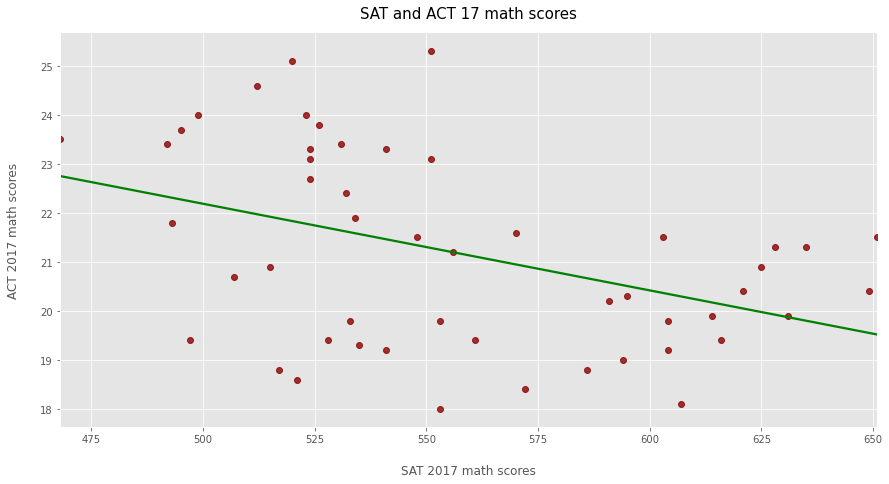

In [245]:
lmplots(final_sat_act, 'sat_17_math', 'act_17_math', 
        'SAT and ACT 17 math scores', 'SAT 2017 math scores', 
        'ACT 2017 math scores')

The scatter points are dispersed and a negative line of best fit is plotted. This shows a negative weak correlation between the variables.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

## SAT and ACT participation box plots

In [253]:
def boxplots(dataframe, title, xlabel = None, yticklabels = None, palette='coolwarm'):    
    plt.figure(figsize=(11,7))
    sns.boxplot(data=dataframe, orient='h', palette=palette, width=0.5)
        # Set titles, labels, etc here for each subplot
    plt.title(title, fontsize=20, pad=15)
    plt.xlabel(xlabel, labelpad=20, fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(ticks=[tick for tick in range(len(dataframe.columns))], labels= yticklabels, fontsize=15)
    plt.show()

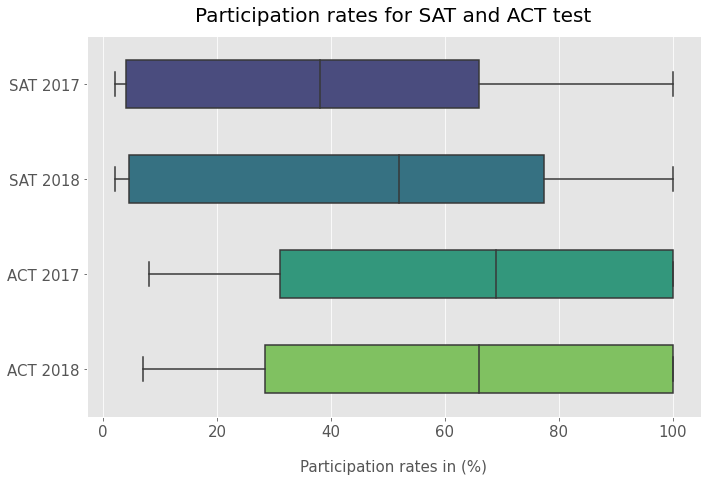

In [254]:
all_part = final_sat_act[['sat_17_participation', 'sat_18_participation', 'act_17_participation', 'act_18_participation']]
boxplots(all_part, 'Participation rates for SAT and ACT test', 'Participation rates in (%)', ['SAT 2017', 'SAT 2018', 'ACT 2017', 'ACT 2018'], palette='viridis')

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

The skewness of the data, right / left skewed? 

The spread of the data, your standard deviation. (look at your histogram)

Central Tendency - Mean, Median, Mode

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

Based on my analysis, the three states that I've chosen to investigate Colorado, Illinois and Arkansas. Colorado's SAT participation rate has increased from 11% to 100% from 2017 to 2018 while their ACT participation rate has decreased from 100% to 30%. A similiar trend was found in Illinois where the participation rate has increased from 9% in 2017 to to 99% in 2018 while their ACT participation rate has decreased from 93% to 43%. Arkansas' participation rate for SAT remains the lowest year-to-year while their participation rate for ACT tests is one of the highest.

Colorado state officials switched from the mandatory ACT to the mandatory SAT which resulted in a decrease in ACT participation and an increase in SAT participation. The reason behind the switch is that the Colorado Department of Education (CDE) remarked the exam is more closely aligned to the state's academic standards and to prepare them for life after high school. (1) (2)

According to the Chicago Tribune, Illinois State Board of Education (ISBE) made the switch as well from ACT the SAT after weighing the attributes of both exams and decided SAT's standards was better aligned with Illinois. (3)

For both states, the average scores for SAT decreases significantly as a greater number of students took the test while the average scores for the ACT increased as a result of a smaller group of students taking it. For instance, Colorado's SAT scores went from 1201 in 2017 to 1025 in 2018 while the ACT average score went from 20.8 in 2017 to 23.9 in 2018.

In Arkansas, the ACT is used as an admission requirement to enter colleges or universities which is why there's a a very high participation rate for ACT and it's considered an "ACT state". (4) (5)

### References

* [Testive](https://www.testive.com/colorado-sat-change-2017/) (1) 

* [Chalkbeat](https://co.chalkbeat.org/2017/8/17/21100853/sat-scores-show-mixed-results-on-whether-colorado-juniors-are-on-track-for-college) (2)

* [Chicagotribune](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html) (3)

* [University of Arkansas](https://admissions.uark.edu/apply/test-scores/index.php) (4)

* [Arkansas Department of Education](http://dese.ade.arkansas.gov/divisions/learning-services/assessment/the-act) (5)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

After reviewing the state college entrance exam testing policy and examining the datasets, there is clear evidence that the respective state's policy has a huge influence in the student's participation in these tests. Currently, there are 25 states that require students to take the [SAT or ACT](https://www.edweek.org/ew/section/multimedia/states-require-students-take-sat-or-act.html).

For the tests participation to increase, states can choose to enact a policy of making one of the two tests a mandatory high school graduation requirement if they have not done so. This provides benefits to the state's education systems and to the students. One advantage would be that the standardized test can be used to measure the effectiveness of the high-school educational systems. It can also be used to benchmark students and provides students the guidance to complete one common college application requirement. This will be useful in guiding students to consider their school of choice.  

Let's look at Illinois, where students are mandated to take a standardized test to enter colleges and universities. After Illinois State Board of Education (ISBE) reviewed both tests,  ISBE switched to SAT from ACT. This resulted a large decrease in ACT participation and a large increase in SAT participation from 2017 to 2018. These changes in participation were followed by a decrease in average score for the SAT and an increase in ACT average scores. This shows what happens when a state make a test mandatory - a large drop in the participation rate of the other test.

To resolve this, states need to provide incentives to encourage students to take both tests. Incentives such as giving students time off for test taking, subsidizing the fees and integrating the test into high school curriculum can help to remove the barriers.

Research into other factors such as the median household incomes for each state to see if there's any corrleations into the participation rates would be useful to increase the participation rates.